In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [3]:
df_ZS=pd.read_csv('data/restaurants_zlatestranky.csv')
df_API=pd.read_csv('data/restaurants_Places_API.csv')

In [5]:
#adding empty column to df_ZS
empty_list = []
for i in df_ZS.index:
    empty_list.append(None)
df_ZS["exact_match"] = empty_list

In [126]:
#comparison loop
for i in df_ZS.index:
    if df_ZS["name"][i] == "Céleste":  #assigns None in case of this outiler
        celeste_exception = None
        df_ZS.exact_match.iat[i] = celeste_exception

    elif pd.isna(df_API["name"][i]):   #assigns None is case of no resaurant found by Google API
        df_ZS.exact_match.iat[i] = None
        
    else:                              #assigns true in case of match and False in case of no match
        zs_phones_dict = ast.literal_eval(df_ZS["phones"][i])
        
        zs_phones_list = []
        for n in zs_phones_dict:
            net_number = zs_phones_dict[n][5:]
            zs_phones_list.append(net_number)

        if df_API["formatted_phone_number"][i] in zs_phones_list:
            df_ZS.exact_match.iat[i] = True
        else:
            df_ZS.exact_match.iat[i] = False

df_API["exact_match"] = df_ZS["exact_match"]
            


In [ ]:
#Data comparison starts here!

In [127]:
#Summary
print("Total restaurants found on zlatestranky.cz:", df_ZS.name.count())
print("Restaurants found by Google API search querry for the phone numbers from zlatestranky:", df_ZS.exact_match.count())
print("Out of that, the number of exactly matched phone numbers:", df_ZS.exact_match.sum())
print("This leaves us with", df_ZS.exact_match.count() - df_ZS.exact_match.sum(), "restaurants found by Google API, not matching to respective restaurants from zs. and", df_ZS.name.count() - df_ZS.exact_match.count(), "restaurants, that could not be found at all based on the phone number from zs.")

Total restaurants found on zlatestranky.cz: 2192
Restaurants found by Google API search querry for the phone numbers from zlatestranky: 1101
Out of that, the number of exactly matched phone numbers: 799
This leaves us with 302 restaurants found by Google API, not matching to respective restaurants from zs. and 1091 restaurants, that could not be found at all based on the phone number from zs.


Text(0.5, 1.0, 'Number of ratings')

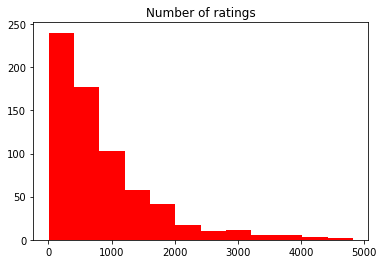

In [134]:
#Further, based on matched restaurants, we can plot the histogram of ratings on Google Maps
#df_API[df_API["exact_match"] == True]["user_ratings_total"]
df_API_exact_match = df_API[df_API["exact_match"] == True]
df_API_outlier = df_API_exact_match[df_API_exact_match["user_ratings_total"] < 5000]
df_API_hist = df_API_outlier["user_ratings_total"]
plt.hist(df_API_hist,color='red', bins=12)
plt.title('Number of ratings')


Text(0.5, 1.0, 'Rating')

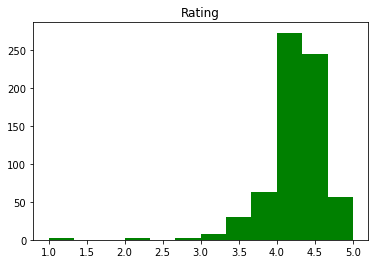

In [133]:
#Further, based on matched restaurants, we can plot the histogram of ratings on Google Maps
plt.hist(df_API[df_API["exact_match"] == True]["rating"],color='green', bins=12)
plt.title('Rating')

In [49]:
#Number of restaurants with at least one review
num_of_ratings = []
for i in df_API[df_API["exact_match"] == True]["user_ratings_total"]:
    if (pd.isna(i) == False):
        num_of_ratings.append(True)
    else:
        num_of_ratings.append(False)

print("Number of restaurants with at least one review:", num_of_ratings.count(True))

Number of restaurants with at least one review: 683


In [86]:
#Highest number of reviews
max_rev = df_API[df_API["exact_match"] == True]["user_ratings_total"].max()

max_df = df_API[df_API["user_ratings_total"] == max_rev]
max_name = max_df.iloc[0]["name"]
max_address = max_df.iloc[0]["formatted_address"]

print("Highest number of reviews:", max_rev, f"({max_name}, located at {max_address})")

Highest number of reviews: 21353.0 (U Fleků, located at Křemencova 11, 110 00 Praha 1-Nové Město, Czechia)


In [90]:
#Mean average of available ratings

mean_ratings = df_API[df_API["exact_match"] == True]["rating"].mean()

print("Mean average of available ratings (rounded):", round(mean_ratings, 2))

Mean average of available ratings: 4.24


In [115]:
#Lowest rating

lowest_rating = df_API[df_API["exact_match"] == True]["rating"].min()
df_exact_match = df_API[df_API["exact_match"] == True]
num_of_lowest = df_exact_match[df_exact_match["rating"] == lowest_rating].count()["name"]
lowest_name = df_exact_match[df_exact_match["rating"] == lowest_rating].iloc[0]["name"]
lowest_address = df_exact_match[df_exact_match["rating"] == lowest_rating].iloc[0]["formatted_address"]
if num_of_lowest == 1:
    print("Lowest rating:", lowest_rating, f"({lowest_name}, located at {lowest_address})")
else:
    print("Lowest rating:", lowest_rating, f"({num_of_lowest} restaurants)")

Lowest rating: 1.0 (3 restaurants)


In [117]:
#Highest rating

highest_rating = df_API[df_API["exact_match"] == True]["rating"].max()
df_exact_match = df_API[df_API["exact_match"] == True]
num_of_highest = df_exact_match[df_exact_match["rating"] == highest_rating].count()["name"]
highest_name = df_exact_match[df_exact_match["rating"] == highest_rating].iloc[0]["name"]
highest_address = df_exact_match[df_exact_match["rating"] == highest_rating].iloc[0]["formatted_address"]
if num_of_highest == 1:
    print("highest rating:", highest_rating, f"({highest_name}, located at {highest_address})")
else:
    print("highest rating:", highest_rating, f"({num_of_highest} restaurants)")

highest rating: 5.0 (17 restaurants)


In [121]:
df_exact_match = df_API[df_API["exact_match"] == True]
df_exact_match

,Unnamed: 0,ZS_name,name,formatted_address,location,rating,user_ratings_total,formatted_phone_number,exact_match
0,0,Repre restaurant,Repre Restaurant,"857, Nekázanka 4, 110 00 Praha 1-Nové Město, C...","{'lat': 50.0854596, 'lng': 14.4273116}",4.0,789.0,222 211 451,True
1,1,Restaurace Nad Ledem,Restaurace Nad Ledem,"10b, Vladivostocká 1460, Vršovice, 100 00 Prah...","{'lat': 50.0689274, 'lng': 14.4791565}",4.4,369.0,728 464 824,True
4,4,1. MEXICKÁ RESTAURACE,Cantina,"Újezd 38, Malá Strana, 118 00 Praha-Praha 1, C...","{'lat': 50.08291369999999, 'lng': 14.404606}",4.5,2285.0,257 317 173,True
5,5,A.H.W. a.s.,A.H.W. a.s.,"11, Na Srpečku 421, 152 00 Praha 5, Czechia","{'lat': 50.03731799999999, 'lng': 14.396561}",NaN,NaN,251 511 913,True
12,12,"Aftermath, s.r.o.",Restaurant Golem,"8, Maiselova 62, Staré Město, 110 00 Praha-Pra...","{'lat': 50.08853489999999, 'lng': 14.4186531}",3.3,381.0,222 244 000,True
...,...,...,...,...,...,...,...,...,...
2183,2183,Subway,Subway,"Jindřišská 30, Nové Město, 110 00 Praha-Praha ...","{'lat': 50.0848266, 'lng': 14.4299558}",3.9,219.0,739 767 952,True
2184,2184,Subway,Subway,"Wilsonova 300/8, Vinohrady, 120 00 Praha-Praha...","{'lat': 50.0832236, 'lng': 14.4350722}",3.0,116.0,604 777 595,True
2185,2185,Subway,Subway,"V Parku 2336/22, Chodov, 148 00 Praha-Praha 11...","{'lat': 50.026467, 'lng': 14.4963904}",4.1,137.0,775 402 976,True
2188,2188,Vlasta VIDMANOVÁ,Vlasta Vidmanová,"9, Mendelova 555, 149 00 Praha 11, Czechia","{'lat': 50.0327712, 'lng': 14.5325675}",NaN,NaN,272 918 177,True


In [87]:
df_API

,Unnamed: 0,ZS_name,name,formatted_address,location,rating,user_ratings_total,formatted_phone_number,exact_match
0,0,Repre restaurant,Repre Restaurant,"857, Nekázanka 4, 110 00 Praha 1-Nové Město, C...","{'lat': 50.0854596, 'lng': 14.4273116}",4.0,789.0,222 211 451,True
1,1,Restaurace Nad Ledem,Restaurace Nad Ledem,"10b, Vladivostocká 1460, Vršovice, 100 00 Prah...","{'lat': 50.0689274, 'lng': 14.4791565}",4.4,369.0,728 464 824,True
2,2,SRI LANKAN CURRY HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,None
3,3,Restaurace HOOTERS Vodičkova,NaN,NaN,NaN,NaN,NaN,NaN,None
4,4,1. MEXICKÁ RESTAURACE,Cantina,"Újezd 38, Malá Strana, 118 00 Praha-Praha 1, C...","{'lat': 50.08291369999999, 'lng': 14.404606}",4.5,2285.0,257 317 173,True
...,...,...,...,...,...,...,...,...,...
2187,2187,Vít Kos - La Lavande,NaN,NaN,NaN,NaN,NaN,NaN,None
2188,2188,Vlasta VIDMANOVÁ,Vlasta Vidmanová,"9, Mendelova 555, 149 00 Praha 11, Czechia","{'lat': 50.0327712, 'lng': 14.5325675}",NaN,NaN,272 918 177,True
2189,2189,Výtopna Railway Restaurant - Palladium,Výtopna Railway Restaurant - Wenceslas Square,"Václavské nám. 802/56, 110 00 Praha 1-Nové Měs...","{'lat': 50.08020020000001, 'lng': 14.4285602}",4.1,3974.0,775 444 554,True
2190,2190,Zahradní restaurace | Park Podviňák Kovanecká,608 420,"608 420, 250 70 Odolena Voda, Czechia","{'lat': 50.2277496, 'lng': 14.3979093}",NaN,NaN,NaN,False
